<a href="https://colab.research.google.com/github/aayushkubb/learnopencv/blob/master/keras_mlp_FSASION_mnist_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
from __future__ import print_function

# Load Data

Keras comes with the MNIST data loader. Keras has a function `mnist.load_data()` which downloads the data from its servers if it is not present already. The data loaded using this function is divided into training and test sets.

In [3]:
from keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Using TensorFlow backend.


4423680/4422102 [==============================] - 0s 0us/step


# Checkout the data

The data consists of handwritten numbers ranging from 0 to 9, along with their ground truth. It has 60,000 train samples and 10,000 test samples. Each sample is a 28x28 grayscale image.

In [0]:
from keras.utils import to_categorical

In [6]:
print('Training data shape : ', train_images.shape, train_labels.shape)

print('Testing data shape : ', test_images.shape, test_labels.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [7]:
# Find the unique numbers from the train labels
classes = np.unique(train_labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : 9')

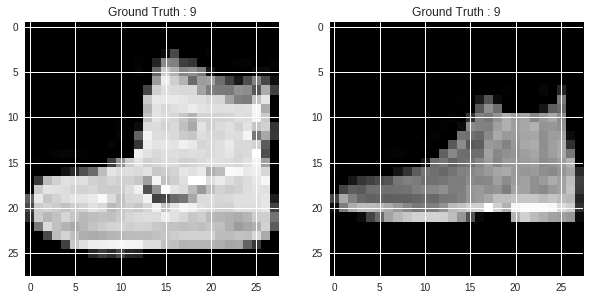

In [8]:
plt.figure(figsize=[10,5])
# Display the first image in training data
plt.subplot(121)
plt.imshow(train_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[0]))
# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[0]))

# Process the data

* The images are grayscale and the pixel values range from 0 to 255.
* Convert each image matrix ( 28x28 ) to an array ( 28*28 = 784 dimenstional ) which will be fed to the network as a single feature.
* We convert the data to float and **scale** the values between 0 to 1.
* We also convert the labels from integer to **categorical ( one-hot ) encoding** since that is the format required by Keras to perform multiclass classification. One-hot encoding is a type of boolean representation of integer data. It converts the integer to an array of all zeros except a 1 at the index of the number. For example, using a one-hot encoding of 10 classes, the integer 5 will be encoded as 0000010000

In [9]:
train_images.shape

(60000, 28, 28)

In [10]:
test_images.shape

(10000, 28, 28)

In [12]:
help(np.prod)

Help on function prod in module numpy.core.fromnumeric:

prod(a, axis=None, dtype=None, out=None, keepdims=<class 'numpy._globals._NoValue'>)
    Return the product of array elements over a given axis.
    
    Parameters
    ----------
    a : array_like
        Input data.
    axis : None or int or tuple of ints, optional
        Axis or axes along which a product is performed.  The default,
        axis=None, will calculate the product of all the elements in the
        input array. If axis is negative it counts from the last to the
        first axis.
    
        .. versionadded:: 1.7.0
    
        If axis is a tuple of ints, a product is performed on all of the
        axes specified in the tuple instead of a single axis or all the
        axes as before.
    dtype : dtype, optional
        The type of the returned array, as well as of the accumulator in
        which the elements are multiplied.  The dtype of `a` is used by
        default unless `a` has an integer dtype of les

In [13]:

train_images.shape[1:]

(28, 28)

In [0]:
dimData = np.prod(train_images.shape[1:])

In [15]:
dimData

784

In [16]:
train_images.shape[0]

60000

In [0]:
train_data = train_images.reshape(train_images.shape[0], dimData)
test_data = test_images.reshape(test_images.shape[0], dimData)

In [18]:
train_data.shape

(60000, 784)

In [19]:
test_data.shape

(10000, 784)

In [0]:
# Change to float datatype
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

train_data/=255
test_data/=255


In [22]:
print(len(train_labels))
train_labels

60000


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [0]:
# Change the labels from integer to categorical data
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [24]:
print("before")
print(train_labels[0])
print()
print("after")
print(train_labels_one_hot[0])

before
9

after
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [25]:
# Display the change for category label using one-hot encoding
print('Original label 0 : ', train_labels[0])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[0])

Original label 0 :  9
After conversion to categorical ( one-hot ) :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


# Create the network

In [0]:
from keras.models import Sequential
from keras.layers import Dense

In [0]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(nClasses, activation='softmax'))

In [0]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1, 
                   validation_data=(test_data, test_labels_one_hot))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 68us/step - loss: 0.6275 - acc: 0.7690 - val_loss: 0.5509 - val_acc: 0.7971
Epoch 2/10
60000/60000 [==============================] - 2s 29us/step - loss: 0.4085 - acc: 0.8486 - val_loss: 0.4835 - val_acc: 0.8245
Epoch 3/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.3611 - acc: 0.8674 - val_loss: 0.4428 - val_acc: 0.8380
Epoch 4/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.3262 - acc: 0.8782 - val_loss: 0.3723 - val_acc: 0.8684
Epoch 5/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.3026 - acc: 0.8876 - val_loss: 0.3517 - val_acc: 0.8745
Epoch 6/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.2852 - acc: 0.8931 - val_loss: 0.4523 - val_acc: 0.8467
Epoch 7/10
60000/60000 [==============================] - 2s 28us/step - loss: 0

Text(0.5, 1.0, 'Loss Curves')

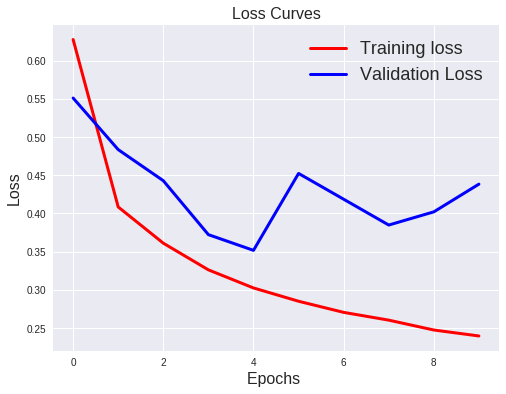

In [33]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5, 1.0, 'Accuracy Curves')

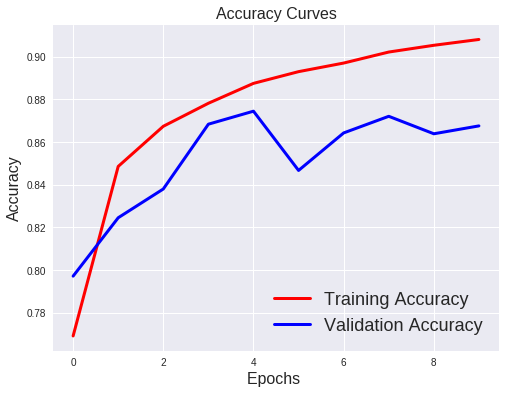

In [34]:
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [0]:
#Model Evaluation

In [36]:
[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)

10000/10000 [==============================] - 1s 50us/step


In [37]:
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

Evaluation result on Test Data : Loss = 0.4383388122677803, accuracy = 0.8676


In [0]:
# With Dropuot

In [0]:
from keras.layers import Dropout
model_reg = Sequential()
model_reg.add(Dense(512, activation='relu', input_shape=(dimData,)))
model_reg.add(Dropout(0.5))
model_reg.add(Dense(512, activation='relu'))
model_reg.add(Dropout(0.5))
model_reg.add(Dense(nClasses, activation='softmax'))

In [0]:
model_reg.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [52]:
history_reg = model_reg.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1, 
                            validation_data=(test_data, test_labels_one_hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 32us/step - loss: 0.6805 - acc: 0.7535 - val_loss: 0.5103 - val_acc: 0.8022
Epoch 2/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.4696 - acc: 0.8286 - val_loss: 0.4358 - val_acc: 0.8363
Epoch 3/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.4261 - acc: 0.8463 - val_loss: 0.4328 - val_acc: 0.8379
Epoch 4/20
60000/60000 [==============================] - 2s 25us/step - loss: 0.3978 - acc: 0.8546 - val_loss: 0.3697 - val_acc: 0.8701
Epoch 5/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.3881 - acc: 0.8604 - val_loss: 0.3758 - val_acc: 0.8633
Epoch 6/20
60000/60000 [==============================] - 2s 25us/step - loss: 0.3748 - acc: 0.8643 - val_loss: 0.3827 - val_acc: 0.8636
Epoch 7/20
60000/60000 [==============================] - 2s 25us/step - loss: 0.3639 - acc: 0.8686 - val_loss: 0.4251 - val_acc

Text(0.5, 1.0, 'Loss Curves')

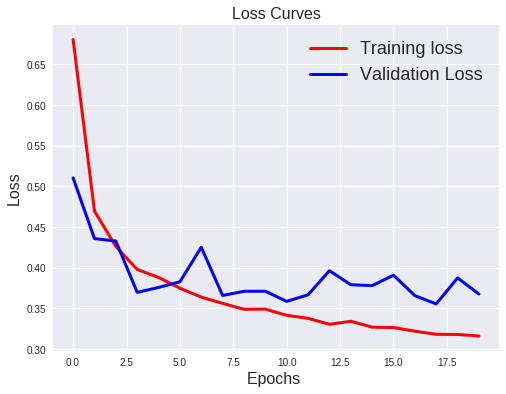

In [53]:
plt.figure(figsize=[8,6])
plt.plot(history_reg.history['loss'],'r',linewidth=3.0)
plt.plot(history_reg.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5, 1.0, 'Accuracy Curves')

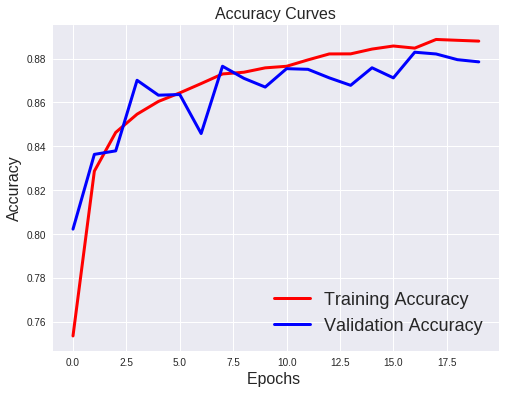

In [54]:
plt.figure(figsize=[8,6])
plt.plot(history_reg.history['acc'],'r',linewidth=3.0)
plt.plot(history_reg.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [0]:
#Model Evaluation

In [56]:
[test_loss, test_acc] = model_reg.evaluate(test_data, test_labels_one_hot)

10000/10000 [==============================] - 0s 49us/step


In [57]:
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

Evaluation result on Test Data : Loss = 0.3676383327126503, accuracy = 0.8785


In [58]:
# Predict the probabilities for each class 
model_reg.predict(test_data[[0],:])

array([[3.3250117e-10, 2.6810032e-13, 5.1917772e-09, 6.4647376e-12,
        7.1740534e-09, 1.7770076e-03, 1.3640447e-08, 2.8440147e-03,
        4.3241872e-09, 9.9537897e-01]], dtype=float32)

In [59]:
test_labels[0]

9

In [60]:
# Predict the most likely class
print(test_labels[10])
model_reg.predict_classes(test_data[[10],:])


4


array([4])